In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mlgrad.af as af
import mlgrad.func as func
import mlgrad.utils as utils
import pandas as pd

import mlgrad.pca as pca

In [2]:
df = pd.read_csv("data/kelly1984.csv", sep=',')
df

,heelstick,catheter
0,23.0,25.2
1,33.2,26.0
2,16.6,16.3
3,26.3,27.2
4,20.0,23.2
5,20.0,18.1
6,20.6,22.2
7,18.9,17.2
8,17.8,18.8
9,20.0,16.4


In [3]:
X0 = df.values
N = len(X0)
W = X0[:,0].max() - X0[:,0].min()
H = X0[:,1].max() - X0[:,1].min()
W /= 4
H /= 4

In [29]:
alpha = (N-3)/N
print(alpha)

0.85


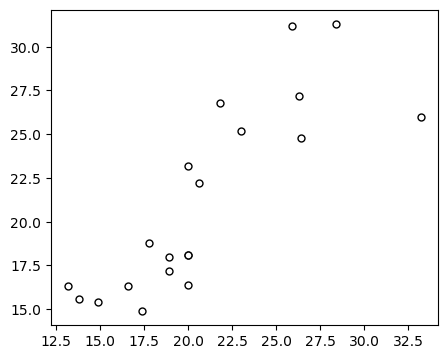

In [30]:
aa = 16/9
plt.figure(figsize=(W,H))
plt.scatter(X0[:,0], X0[:,1], c='w', s=25, edgecolors='k')
plt.show()

[20.855 21.15 ]


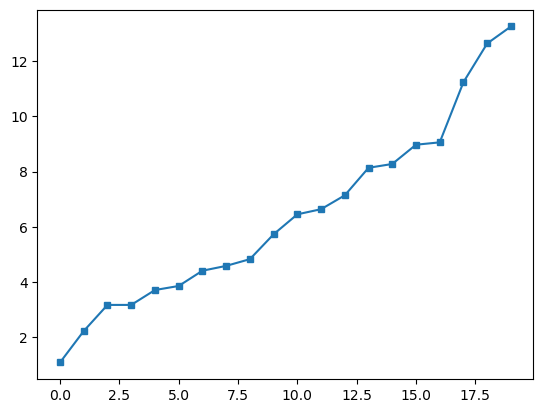

In [31]:
c0 = pca.location(X0)
print(c0)
plt.plot(sorted(pca.distance_center(X0, c0)), marker='s', markersize=4)
plt.show()

[20.425 20.805]


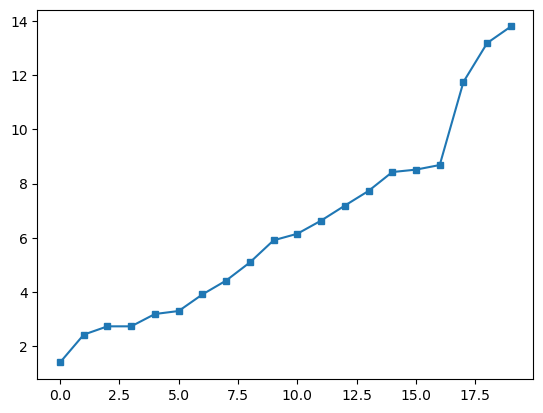

In [32]:
# alpha = (N-5)/N
wma = af.averaging_function("WM", rhofunc=func.Quantile_Sqrt(alpha, 0.001))
c = pca.robust_location(X0, wma)
print(c)
plt.plot(sorted(pca.distance_center(X0, c)), marker='s', markersize=4)
plt.show()

In [33]:
X1 = X0 - c
X1_0 = X0 - c0

K: 10 48.0162744705285 [0.68288247 0.73052826]
48.0162744705285 [0.68288247 0.73052826]


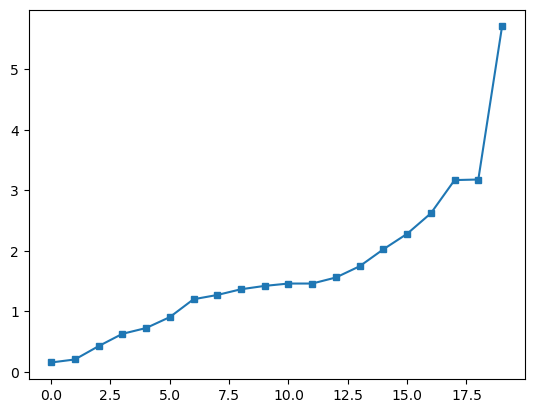

In [34]:
a1_0, L1_0 = pca.find_pc(X1_0, tol=1.0e-9, verbose=1)
print(L1_0, a1_0)
plt.plot(sorted(pca.distance_line(X1_0, a1_0)), marker='s', markersize=4)
plt.show()

38.26124015588006 [0.57143796 0.82064527]


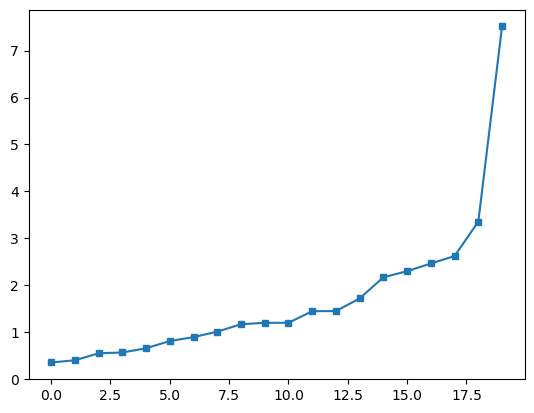

In [35]:
# alpha = (N-3)/N
wma = af.averaging_function("WM", rhofunc=func.Quantile_Sqrt(alpha, 0.001))
a1, L1 = pca.find_robust_pc(X1, wma, tol=1.0e-9)
print(L1, a1)
plt.plot(sorted(pca.distance_line(X1, a1)), marker='s', markersize=4)
plt.show()

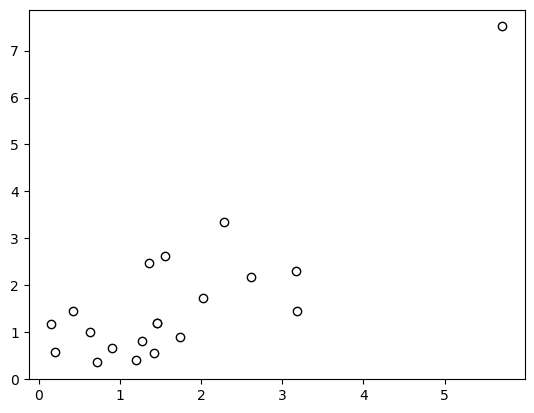

In [36]:
plt.scatter(pca.distance_line(X1_0, a1_0), pca.distance_line(X1, a1), c='w', edgecolors='k')
plt.show()

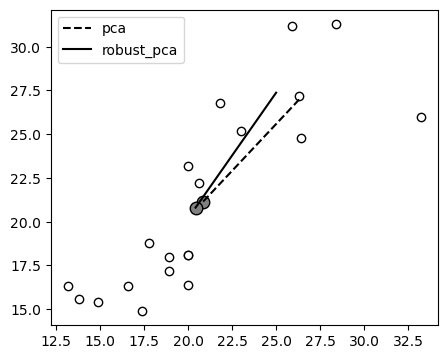

In [37]:
plt.figure(figsize=(W,H))
plt.scatter(X0[:,0], X0[:,1], c='w', edgecolors='k')
plt.scatter([c0[0]], [c0[1]], s=81, c='grey', edgecolors='k')
plt.scatter([c[0]], [c[1]], s=81, c='grey', edgecolors='k')
plt.plot([c0[0], c0[0]+8*a1_0[0]], [c0[1], c0[1]+8*a1_0[1]], c='k', linestyle='--', label='pca')
plt.plot([c[0], c[0]+8*a1[0]], [c[1], c[1]+8*a1[1]], c='k', label='robust_pca')
plt.legend()
plt.show()

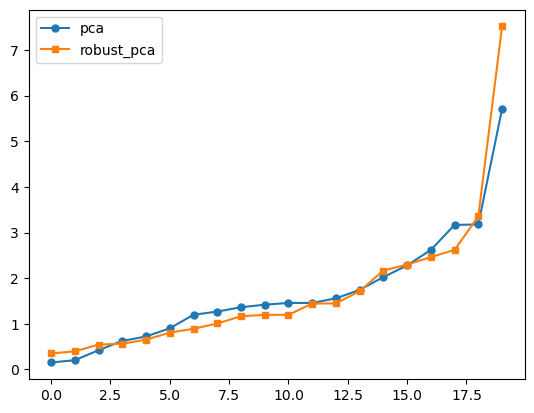

In [38]:
plt.plot(sorted(pca.distance_line(X1_0, a1_0)), marker='o', markersize=5, label='pca')
plt.plot(sorted(pca.distance_line(X1, a1)), marker='s', markersize=5, label='robust_pca')
plt.legend()
plt.show()

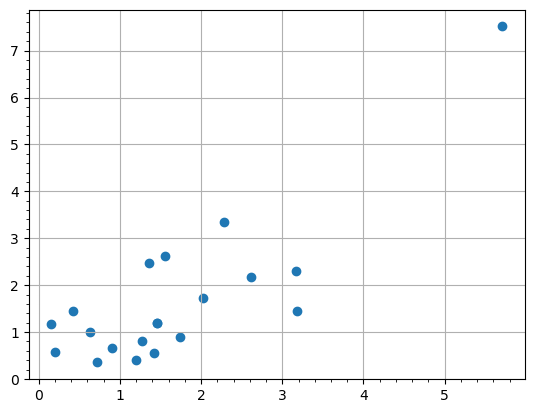

In [39]:
plt.scatter(pca.distance_line(X1_0, a1_0), pca.distance_line(X1, a1))
plt.minorticks_on()
plt.grid(1)
plt.show()

In [40]:
X2 = pca.project(X1, a1)
X2_0 = pca.project(X1_0, a1_0)

In [41]:
a2_0, L2_0 = pca.find_pc(X2_0, tol=1.0e-9)
print(L2_0, a2_0, a2_0 @ a2_0)

4.373700529471515 [-0.73052826  0.68288247] 1.0


In [42]:
# alpha = (N-5)/N
wma = af.averaging_function("WM", rhofunc=func.Quantile_Sqrt(alpha, 0.001))
a2, L2 = pca.find_robust_pc(X2, wma, tol=1.0e-9)
print(L2, a2)
print(a1 @ a2)

2.469411480013782 [ 0.82064527 -0.57143796]
2.220446049250313e-16


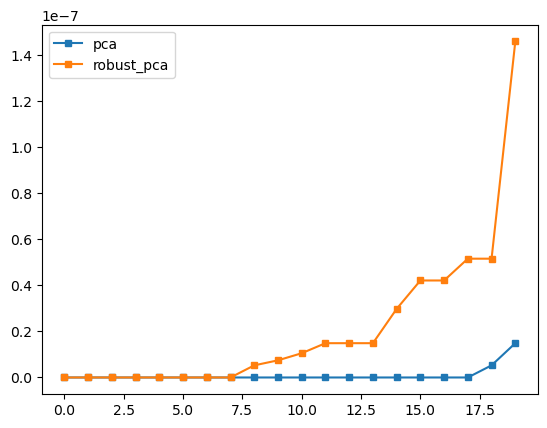

In [43]:
plt.plot(sorted(pca.distance_line(X2_0, a2_0)), marker='s', markersize=4, label='pca')
plt.plot(sorted(pca.distance_line(X2, a2)), marker='s', markersize=4, label='robust_pca')
plt.legend()
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


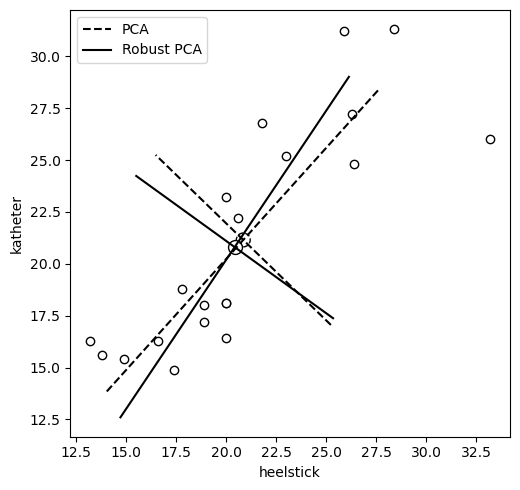

In [44]:
aa = 16/9
plt.figure(figsize=(5.3, 5.0))
plt.scatter(X0[:,0], X0[:,1], c='w', edgecolors='k')
plt.scatter([c0[0]], [c0[1]], s=100, c='w', edgecolors='k', linestyle='--')
plt.scatter([c[0]], [c[1]], s=100, c='w', edgecolors='k')
plt.plot([c0[0]-10*a1_0[0], c0[0], c0[0]+10*a1_0[0]], [c0[1]-10*a1_0[1], c0[1], c0[1]+10*a1_0[1]], 
         c='k', linestyle='--', label='PCA')
plt.plot([c0[0]-6*a2_0[0], c0[0], c0[0]+6*a2_0[0]], [c0[1]-6*a2_0[1], c0[1], c0[1]+6*a2_0[1]], 
         c='k', linestyle='--')
plt.plot([c[0]-10*a1[0], c[0], c[0]+10*a1[0]], [c[1]-10*a1[1], c[1], c[1]+10*a1[1]], 
         c='k', label='Robust PCA')
plt.plot([c[0]-6*a2[0], c[0], c[0]+6*a2[0]], [c[1]-6*a2[1], c[1], c[1]+6*a2[1]], 
         c='k')
plt.legend()
plt.xlabel('heelstick')
plt.ylabel('katheter')
plt.tight_layout()
plt.savefig('fig/robust_pca_kelly_0.eps')
plt.show()

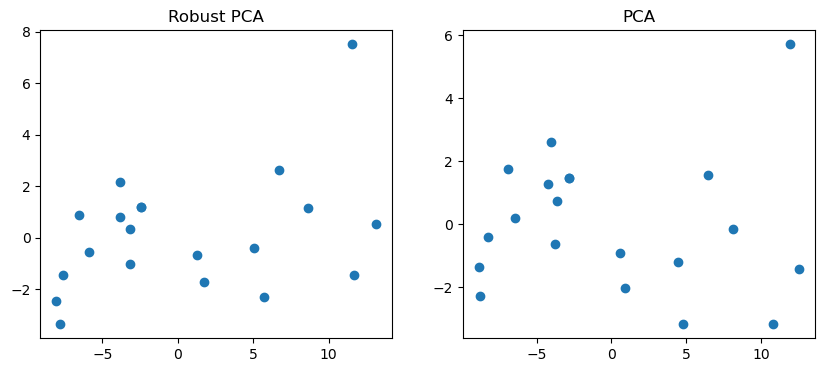

In [46]:
U1 = X1 @ a1
U2 = X1 @ a2

U1_0 = X1_0 @ a1_0
U2_0 = X1_0 @ a2_0

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title('Robust PCA')
plt.scatter(U1, U2)
plt.subplot(1,2,2)
plt.title('PCA')
plt.scatter(U1_0, -U2_0)
plt.savefig('fig/robust_pca_starsCYG_transformed.eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


1047.7995 1064.774000638995


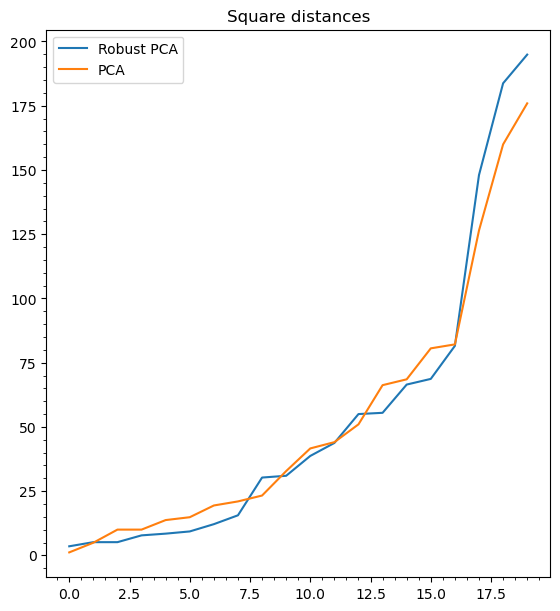

In [21]:
D = U1 * U1 + U2 * U2
D_0 = U1_0 * U1_0 + U2_0 * U2_0

print(D_0.sum(), D.sum())

plt.figure(figsize=(6.5,4*aa))
plt.title('Square distances')
plt.plot(sorted(D), label='Robust PCA')
plt.plot(sorted(D_0), label='PCA')
plt.minorticks_on()
plt.legend()
plt.savefig('fig/robust_pca_starsCYG_SD.eps')
plt.show()

In [22]:
from mlgrad.pca.location_scatter import robust_scatter_matrix

In [23]:
wma = af.averaging_function("WM", rhofunc=func.Quantile_Sqrt((N-6)/N, 0.001))
S = pca.robust_scatter_matrix(X1, wma)
print(S)

K: 99
[[ 1.92526011 -1.50175741]
 [-1.50175741  1.69082364]]


In [24]:
L, A = np.linalg.eig(S)
print(A)
np.dot(A[0], A[1])

[[ 0.734104    0.67903706]
 [-0.67903706  0.734104  ]]


0.0

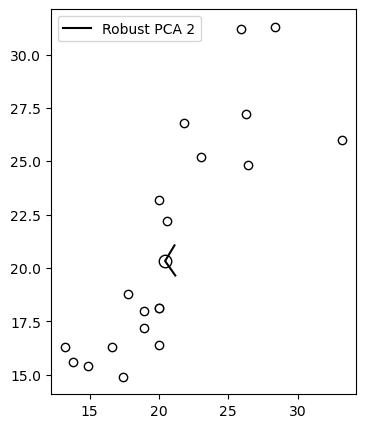

In [25]:
plt.figure(figsize=(7/(1920/1080),5))
plt.scatter(X0[:,0], X0[:,1], c='w', edgecolors='k')
plt.scatter([c[0]], [c[1]], s=81, c='w', edgecolors='k')
plt.plot([c[0]+A[0,0], c[0], c[0]+A[0,1]], [c[1]+A[1,0], c[1], c[1]+A[1,1]], 
         c='k', label='Robust PCA 2')
# plt.plot([c[0], c[0]+A[0,0]], [c[1], c[1]+A[1,0]], label='1')
# plt.plot([c[0], c[0]+A[0,1]], [c[1], c[0]+A[1,1]], label='2')
plt.legend()
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


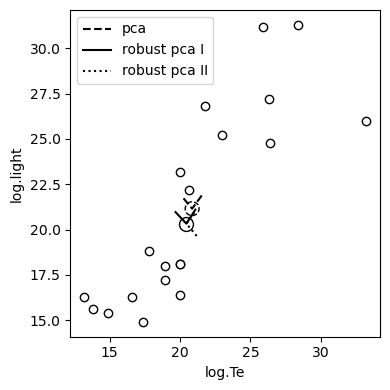

In [26]:
plt.figure(figsize=(4,4))
plt.scatter(X0[:,0], X0[:,1], c='w', edgecolors='k')
plt.scatter([c0[0]], [c0[1]], s=100, c='w', edgecolors='k', linestyle='--')
plt.scatter([c[0]], [c[1]], s=100, c='w', edgecolors='k')
plt.plot([c0[0]+a1_0[0], c0[0], c0[0]+a2_0[0]], [c0[1]+a1_0[1], c0[1], c0[1]+a2_0[1]], 
         c='k', linestyle='--', label='pca')
plt.plot([c[0]+a1[0], c[0], c[0]+a2[0]], [c[1]+a1[1], c[1], c[1]+a2[1]], 
         c='k', label='robust pca I')
plt.plot([c[0]+A[0,0], c[0], c[0]+A[0,1]], [c[1]+A[1,0], c[1], c[1]+A[1,1]], 
         c='k', linestyle=':', label='robust pca II')
plt.legend()
plt.xlabel('log.Te')
plt.ylabel('log.light')
plt.tight_layout()
plt.savefig('fig/robust_pca_starsCYG_1.eps')
plt.show()

In [27]:
from sklearn.decomposition import PCA

In [28]:
pca_sk = PCA()
pca_sk.fit(XY0)
AA = pca_sk.components_
print(AA)
pca_sk.mean_

NameError: name 'XY0' is not defined

In [ ]:
plt.figure(figsize=(7/(1920/1080),5))
plt.scatter(XY1[:,0], XY1[:,1], c='w', edgecolors='k')
plt.scatter([0], [0], s=81, c='b')
plt.plot([-AA[0,0], 0, AA[0,0]], [-AA[1,0], 0, AA[1,0]], linestyle='--', label='1 (sk)')
plt.plot([-AA[0,1], 0, AA[0,1]], [-AA[1,1], 0, AA[1,1]], linestyle='--', label='2 (sk)')
plt.plot([-A[0,0], 0, A[0,0]], [-A[1,0], 0, A[1,0]], label='1')
plt.plot([-A[0,1], 0, A[0,1]], [-A[1,1], 0, A[1,1]], label='2')
plt.legend()
plt.show()